# Kickstarter Project Analysis

### Project Objective
The objective of this project is to analyze historical Kickstarter data between(2009-04-21 and 2018-01-02) to identify key factors and trends that influence project success, providing data-driven insights for potential investors.

### Questions to be Answered
1. Which category has the highest success percentage? How many projects have been successful in total?
2. What project with a goal over $1,000 USD had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged for this project?
3. Can you identify any trends in project success rates over the years?
4. As an investor, what types of projects should you be looking at to guarantee future success?

## Import & Clean Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
kickstarter_df = pd.read_csv(r'C:\Users\ramma\Downloads\Linkedin Projects\Kickstarter+Projects python project\kickstarter_projects.csv')

kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02 14:13:09,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02 14:15:38,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02 14:17:46,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02 14:38:17,2018-02-01,650,7,1,Live


In [3]:
kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [4]:
kickstarter_df.duplicated().sum()   

np.int64(0)

In [5]:
# change Deadline and Launched columns to datetime format
kickstarter_df['Deadline'] = pd.to_datetime(kickstarter_df['Deadline'])
kickstarter_df['Launched'] = pd.to_datetime(kickstarter_df['Launched'])
kickstarter_df['Launched'] = kickstarter_df['Launched'].dt.normalize()


kickstarter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
dtypes: datetime64[ns](2), int64(4), object(5)
memory usage: 31.5+ MB


In [6]:
kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live


In [7]:
# count of projects by country

kickstarter_df.groupby('Country').count().sort_values('ID', ascending=False)

,ID,Name,Category,Subcategory,Launched,Deadline,Goal,Pledged,Backers,State
Country,,,,,,,,,,
United States,292618,292618,292618,292618,292618,292618,292618,292618,292618,292618
United Kingdom,33671,33671,33671,33671,33671,33671,33671,33671,33671,33671
Canada,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
Australia,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839
Germany,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171
France,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939
Italy,2878,2878,2878,2878,2878,2878,2878,2878,2878,2878
Netherlands,2868,2868,2868,2868,2868,2868,2868,2868,2868,2868
Spain,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276


In [8]:
kickstarter_df.describe()

,ID,Launched,Deadline,Goal,Pledged,Backers
count,3.748530e+05,374853,374853,3.748530e+05,3.748530e+05,374853.000000
mean,1.074656e+09,2014-09-25 22:47:52.082656512,2014-10-30 04:00:35.149778944,4.586378e+04,9.121073e+03,106.690359
min,5.971000e+03,2009-04-21 00:00:00,2009-05-03 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,5.380728e+08,2013-04-30 00:00:00,2013-06-01 00:00:00,2.000000e+03,3.100000e+01,2.000000
50%,1.075300e+09,2014-12-02 00:00:00,2015-01-06 00:00:00,5.500000e+03,6.250000e+02,12.000000
75%,1.610149e+09,2016-03-29 00:00:00,2016-05-01 00:00:00,1.600000e+04,4.051000e+03,57.000000
max,2.147476e+09,2018-01-02 00:00:00,2018-03-03 00:00:00,1.663614e+08,2.033899e+07,219382.000000
std,6.191377e+08,NaN,NaN,1.158778e+06,9.132054e+04,911.718520


## Exploratory Data Analysis (EDA)

1. Which category has the highest success percentage? How many projects have been successful in total?


In [9]:
kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live


In [10]:
# the number of successful, failed, and canceled projects

state_counts = kickstarter_df['State'].value_counts() 

state_counts

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

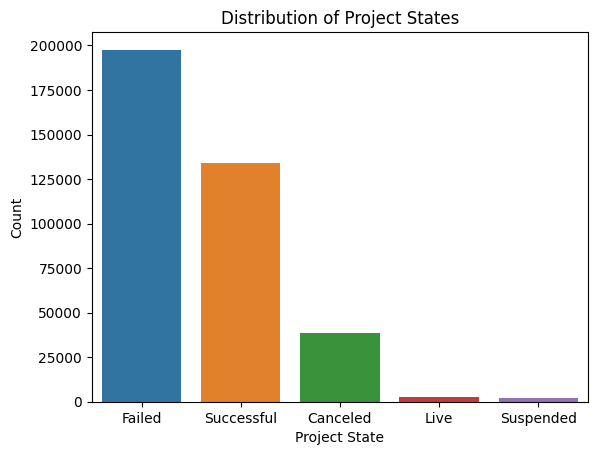

In [11]:
# plot the distribution of project states
sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.index, dodge=False)
plt.xlabel('Project State')
plt.ylabel('Count')
plt.title('Distribution of Project States');





In [12]:
# total projects by category

total_counts = kickstarter_df.groupby('Category')['State'].size().sort_values(ascending=False)

total_counts 

Category
Film & Video    62694
Music           49529
Publishing      39378
Games           35225
Technology      32562
Design          30065
Art             28151
Food            24599
Fashion         22812
Theater         10911
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: State, dtype: int64

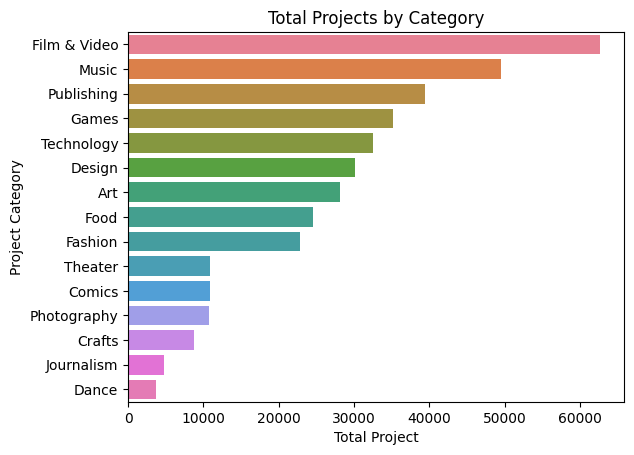

In [13]:
# plot the total projects by category
sns.barplot(y=total_counts.index, x=total_counts.values, hue=total_counts.index, dodge=False)
plt.xlabel('Total Project')
plt.ylabel('Project Category')
plt.title('Total Projects by Category');

In [14]:
# the successful projects by category

successful_counts = kickstarter_df.groupby('Category')['State'].apply(lambda x: (x == 'Successful').sum()).sort_values(ascending=False)

successful_counts 

Category
Music           24105
Film & Video    23612
Games           12518
Publishing      12300
Art             11510
Design          10549
Theater          6534
Technology       6433
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: State, dtype: int64

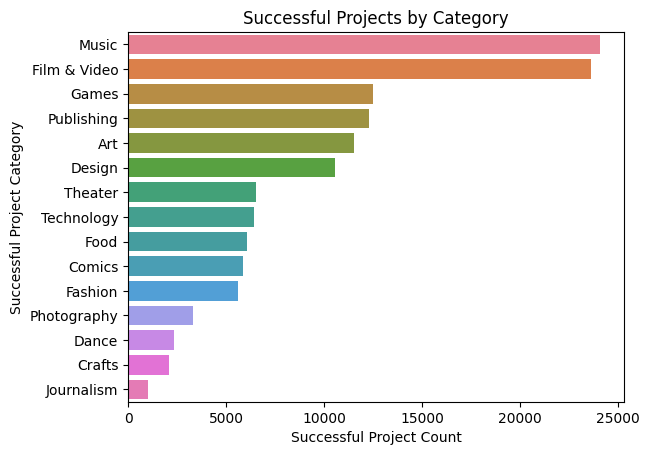

In [15]:
#successful projects by category

sns.barplot(y=successful_counts.index, x=successful_counts.values, hue=successful_counts.index, dodge=False)
plt.xlabel('Successful Project Count')
plt.ylabel('Successful Project Category')
plt.title('Successful Projects by Category');


In [16]:
# percentage of successful projects by category
success_percentage = (successful_counts / total_counts) * 100
success_percentage_sorted = success_percentage.sort_values(ascending=False)

success_percentage_sorted

Category
Dance           62.065304
Theater         59.884520
Comics          53.997597
Music           48.668457
Art             40.886647
Film & Video    37.662296
Games           35.537260
Design          35.087311
Publishing      31.235715
Photography     30.664316
Food            24.736778
Fashion         24.517798
Crafts          24.009536
Journalism      21.287337
Technology      19.756157
Name: State, dtype: float64

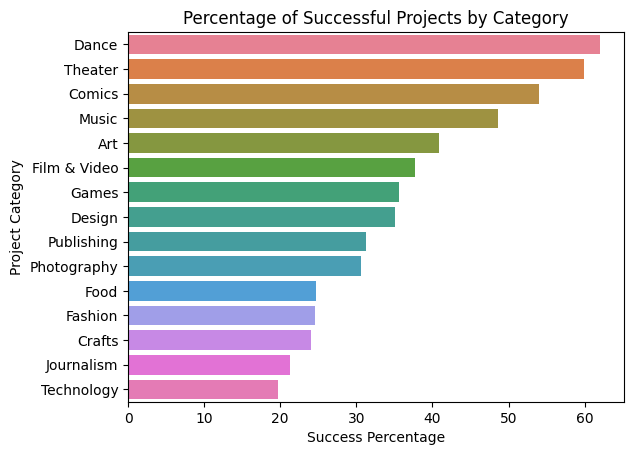

In [17]:
# plot the percentage of successful projects by category
sns.barplot(y=success_percentage_sorted.index, x=success_percentage_sorted.values, hue=success_percentage_sorted.index, dodge=False)
plt.xlabel('Success Percentage')
plt.ylabel('Project Category')
plt.title('Percentage of Successful Projects by Category');


2. What project with a goal over $1,000 USD had the biggest Goal Completion % (Pledged / Goal)? How much money was pledged for this project?


In [18]:
kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live


In [19]:
# filter the dataset to include only successful projects with a goal of at least $1000

filtered_df = kickstarter_df[(kickstarter_df['State'] == 'Successful') & (kickstarter_df['Goal'] >= 1000)].sort_values('Goal', ascending=False).reset_index(drop=True)

filtered_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,880009511,Elite: Dangerous,Games,Video Games,United Kingdom,2012-11-06,2013-01-05,2015609,2545014,25681,Successful
1,1682353635,Camelot Unchained,Games,Video Games,United States,2013-04-02,2013-05-02,2000000,2232933,14873,Successful
2,1454565733,Bring Back MYSTERY SCIENCE THEATER 3000,Film & Video,Television,United States,2015-11-10,2015-12-12,2000000,5764229,48270,Successful
3,947809001,Shenmue 3,Games,Video Games,United States,2015-06-16,2015-07-18,2000000,6333296,69320,Successful
4,1871494789,WISH I WAS HERE,Film & Video,Narrative Film,United States,2013-04-24,2013-05-24,2000000,3105473,46520,Successful
...,...,...,...,...,...,...,...,...,...,...,...
109857,608035670,The Darkest Day EP,Music,Rock,United States,2015-10-09,2015-11-07,1000,1089,31,Successful
109858,1420117216,"EDC Patented Just Adjust Strap - Strong, Relia...",Design,Product Design,United States,2015-10-09,2015-11-08,1000,1013,9,Successful
109859,837177570,Panther Car Recording,Music,Music,United States,2013-05-15,2013-06-14,1000,1080,17,Successful
109860,924849887,"Lend Me a Tenor (...or more, if you have it!)",Theater,Theater,United States,2011-04-19,2011-06-18,1000,1190,21,Successful


In [20]:
# add a new column to the filtered dataset that calculates the percentage of the goal that was pledged

filtered_df['Completion_Pct'] = filtered_df['Pledged'] / filtered_df['Goal'] * 100
filtered_df.sort_values('Completion_Pct', ascending=False, inplace=True)
filtered_df.reset_index(drop=True, inplace=True)

filtered_df




# Exploding Kittens project has the highest completion percentage of (87,825.72%) and Amount Pledged ($8,782,572.72) which is way above its goal of $10,000.00


,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Completion_Pct
0,1955357092,Exploding Kittens,Games,Tabletop Games,United States,2015-01-20,2015-02-20,10000,8782572,219382,Successful,87825.720000
1,565687737,The World's Best TRAVEL JACKET with 15 Feature...,Design,Product Design,United States,2015-07-07,2015-09-03,20000,9192056,44949,Successful,45960.280000
2,1386523707,Fidget Cube: A Vinyl Desk Toy,Design,Product Design,United States,2016-08-30,2016-10-20,15000,6465690,154926,Successful,43104.600000
3,1673731332,"2015 CES Best, First Domestic Robot That Track...",Technology,Robots,United States,2014-12-29,2015-01-28,1000,365538,1627,Successful,36553.800000
4,1697857874,The Component Collector,Games,Tabletop Games,United States,2017-06-01,2017-06-29,1000,327807,2726,Successful,32780.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
109857,1539695749,Fund the Drums,Music,Music,United States,2016-07-26,2016-08-26,2500,2500,22,Successful,100.000000
109858,37501101,The Experience EP 2012,Music,Jazz,United States,2012-04-06,2012-05-06,4300,4300,32,Successful,100.000000
109859,503916933,Liminal at FringeNYC,Theater,Theater,United States,2015-07-02,2015-08-01,2500,2500,35,Successful,100.000000
109860,780863434,TUW Ruhla Watches - Comeback of a Legend,Design,Product Design,Germany,2016-02-08,2016-03-19,27885,27765,90,Successful,99.569661


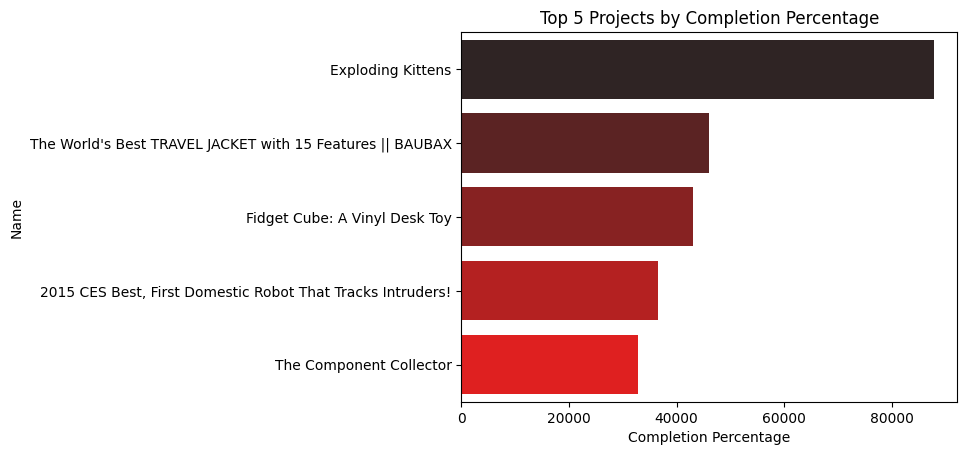

In [21]:
# plot the top 5 projects by completion percentage

sns.barplot(y=filtered_df['Name'].head(5), x=filtered_df['Completion_Pct'].head(5), hue=filtered_df['Name'].head(5), dodge=False, palette='dark:red')
plt.xlabel('Completion Percentage')
plt.title('Top 5 Projects by Completion Percentage');

3. Can you identify any trends in project success rates over the years?


In [22]:
kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed
...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live


In [23]:
# add new columns for the year launched and whether the project was successful

kickstarter_df['Launched_Year'] = kickstarter_df['Launched'].dt.year
kickstarter_df['Is_Successful'] = (kickstarter_df['State'] == 'Successful').astype(int)

kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launched_Year,Is_Successful
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,2009,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,2009,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,2009,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,2009,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live,2018,0
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live,2018,0
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live,2018,0
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live,2018,0


In [24]:
# calculate the annual success rate of projects
annual_success = kickstarter_df.groupby('Launched_Year')['Is_Successful'].mean() * 100
annual_success_df = annual_success.reset_index(name='Success_rate_pct')

annual_success_df

,Launched_Year,Success_rate_pct
0,2009,43.566591
1,2010,43.663846
2,2011,46.390456
3,2012,43.468332
4,2013,43.273263
5,2014,31.504784
6,2015,27.991564
7,2016,33.032050
8,2017,35.367816
9,2018,0.000000


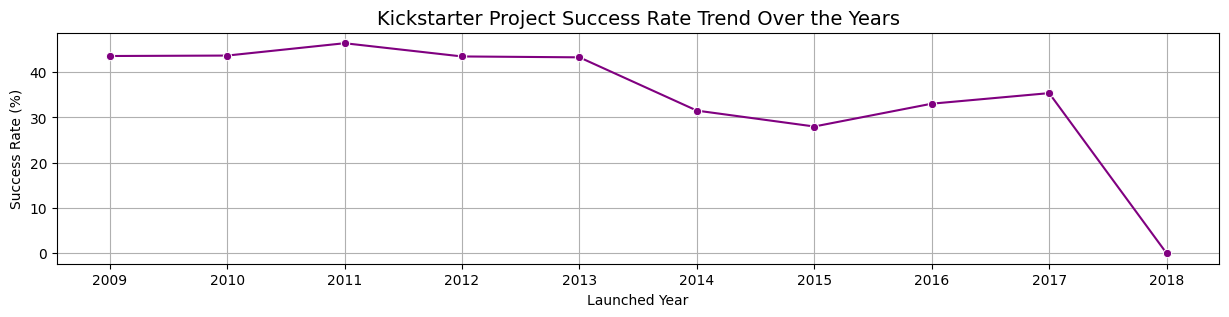

In [30]:
# plot the annual success rate trend
plt.figure(figsize=(15, 3))
sns.lineplot(x=annual_success_df['Launched_Year'], y=annual_success_df['Success_rate_pct'], marker='o', color='purple')
plt.xlabel('Launched Year')
plt.ylabel('Success Rate (%)')
plt.title('Kickstarter Project Success Rate Trend Over the Years', fontsize=14)
plt.xticks(annual_success_df['Launched_Year'].unique().astype(int))
plt.grid(True)


# 2018 show 0 because the data show only projects launched in January 2018

## Annual Best Category Trend

In [26]:
kickstarter_df

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Launched_Year,Is_Successful
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21,2009-05-31,1000,625,30,Failed,2009,0
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23,2009-07-20,80000,22,3,Failed,2009,0
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24,2009-05-03,20,35,3,Successful,2009,1
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25,2009-07-14,99,145,25,Successful,2009,1
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27,2009-05-26,1900,387,10,Failed,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374848,1486845240,Americas Got Talent - Serious MAK,Music,Hip-Hop,United States,2018-01-02,2018-01-16,500,0,0,Live,2018,0
374849,974738310,EVO Planner: The World's First Personalized Fl...,Design,Product Design,United States,2018-01-02,2018-02-09,15000,269,8,Live,2018,0
374850,2106246194,"Help save La Gattara, Arizona's first Cat Cafe!",Food,Food,United States,2018-01-02,2018-01-16,10000,165,3,Live,2018,0
374851,1830173355,Digital Dagger Coin,Art,Art,United States,2018-01-02,2018-02-01,650,7,1,Live,2018,0


In [27]:
yearly_category_success_df = kickstarter_df.groupby(['Launched_Year', 'Category'])['Is_Successful'].mean().mul(100).reset_index(name='Success_rate_pct')

yearly_category_success_df




,Launched_Year,Category,Success_rate_pct
0,2009,Art,45.562130
1,2009,Comics,52.173913
2,2009,Crafts,36.363636
3,2009,Dance,37.500000
4,2009,Design,25.806452
...,...,...,...
144,2018,Music,0.000000
145,2018,Photography,0.000000
146,2018,Publishing,0.000000
147,2018,Technology,0.000000


In [28]:
# for each year, identify the category with the highest success rate
yearly_category_success_df.sort_values(by='Success_rate_pct', ascending=False).drop_duplicates(subset='Launched_Year', keep='first').sort_values(by='Launched_Year').reset_index(drop=True) 

,Launched_Year,Category,Success_rate_pct
0,2009,Music,53.220339
1,2010,Dance,63.905325
2,2011,Dance,72.397094
3,2012,Dance,72.156863
4,2013,Dance,71.719039
5,2014,Dance,58.748222
6,2015,Theater,53.503563
7,2016,Dance,60.930233
8,2017,Comics,61.938062
9,2018,Art,0.000000


(0.0, 100.0)

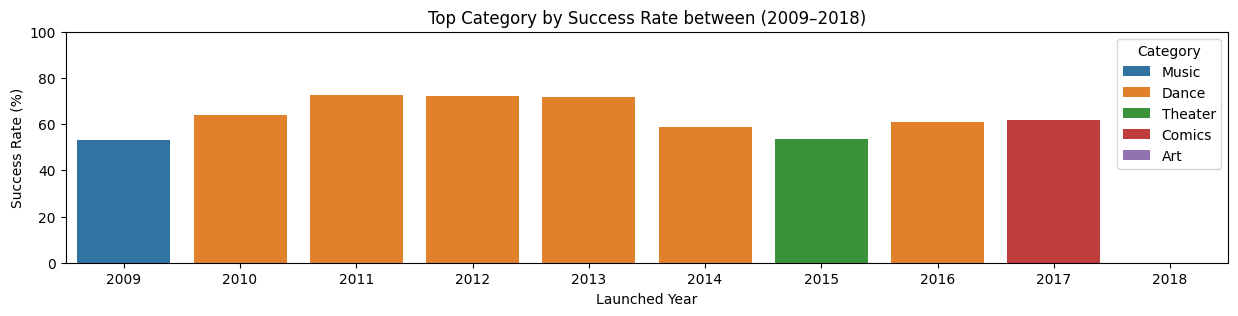

In [29]:
# plot the top category by success rate for each year

plt.figure(figsize=(15, 3))
sns.barplot(x='Launched_Year', y='Success_rate_pct', hue='Category', data=yearly_category_success_df.sort_values(by='Success_rate_pct', ascending=False).drop_duplicates(subset='Launched_Year', keep='first').sort_values(by='Launched_Year').reset_index(drop=True), dodge=False)
plt.title('Top Category by Success Rate between (2009–2018)')
plt.ylabel('Success Rate (%)')
plt.xlabel('Launched Year')
plt.ylim(0, 100)



# 4. As an investor, what types of projects should you be looking at to guarantee future success?

### Investor Recommendation: Maximizing Success on Kickstarter

Based on a comprehensive analysis of Kickstarter data, an investor should adopt a strategic, two-pronged approach that balances reliable statistical success with high-risk, high-reward outlier potential.

#### 1. Prioritize Statistical Reliability (High-Probability Strategy)
For steady, reliable returns and minimizing portfolio risk, invest in categories that historically maintain the highest success rates.

* **Actionable Advice:** Focus on **Dance, Theater, and Comics**, which consistently lead the platform in success percentages. These categories demonstrate strong alignment between project goals and community funding habits.

#### 2. Allocate Capital for High-Reward Outliers (Exponential Strategy)
While high-probability categories offer safety, the largest potential returns lie with highly viral projects.

* **Key Insight (Q2):** The highest Goal Completion Percentage belonged to **Exploding Kittens**, which exceeded its goal by over 87,000%.
* **Actionable Advice:** Reserve a portion of capital for early investment in low-goal projects (over $1,000) that show extreme early backing and strong universal appeal, typically found in **Games, Technology, or Design**.

#### 3. Recognize Increased Market Risk (Trend Awareness)
The overall funding environment is more challenging now than in the past.

* **Key Insight (Q3):** Platform-wide success rates have dropped significantly since the peak in 2011, indicating increased competition and saturation. Despite this trend, the Dance category emerged as the most successful between 2009 and 2017.
* **Actionable Advice:** Due diligence on project quality, marketing strategy, and creator experience is more critical than ever before. Focusing on the Dance category would be a smart, data-driven move. 